# Forests of randomized trees
Some References:
- https://www.geeksforgeeks.org/random-forest-regression-in-python/

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Data Preprocessing
- Removing outliers of price
- Apply categorial label

In [3]:
london = pd.read_csv('london_weekdays.csv')
london = london.drop(columns=['Unnamed: 0'])

In [4]:
#To remove outliers from realSum 
# Calculate the quartiles
Q1 = london['realSum'].quantile(0.25)
Q3 = london['realSum'].quantile(0.75)

# Remove outliers of realSum
london = london.loc[((london['realSum'] > (Q1 - 1.5 * (Q3 - Q1))) & (london['realSum'] < (Q3 + 1.5 * (Q3 - Q1))))]
london.shape

(4367, 19)

In [5]:
#Apply categorical label to columns 
london[['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz']].apply(lambda x: x.astype('category'))

#Convert Roomtype to oridinal 
london["room_type"] = london["room_type"].replace({'Shared room': 0, 'Private room': 1, 'Entire home/apt': 2})
london.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,570.098074,2,False,False,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531
1,297.984430,1,False,True,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343
2,336.790611,1,False,True,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407
3,226.722171,1,False,True,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292
4,256.355982,1,False,True,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728


### Split Data

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [7]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(london["realSum"])
x = pd.DataFrame(london[["person_capacity", "bedrooms", "dist", "metro_dist", "attr_index_norm", "rest_index_norm", "room_type", "biz"]])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3493, 8)
(874, 8)
(3493, 1)
(874, 1)


In [8]:
x_train.head()

,person_capacity,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,room_type,biz
825,2.0,0,4.923640,1.402307,17.387269,8.220381,2,1
882,2.0,1,8.162533,0.867835,11.660544,6.117581,1,1
2017,2.0,1,9.327749,0.737540,8.321275,4.773499,1,0
103,2.0,1,3.347186,0.241406,25.301287,15.327482,1,0
22,2.0,1,3.066884,0.500669,25.053400,14.403431,1,1


### Train and Test

In [9]:
# create regressor object
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
model.fit(x, y)

#Prediction using test data set 
y_test_pred = model.predict(x_test)

C:\Users\long\AppData\Local\Temp\ipykernel_17520\76617234.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x, y)


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.958012311255352
Mean Squared Error (MSE) 	: 1180.4796234906446



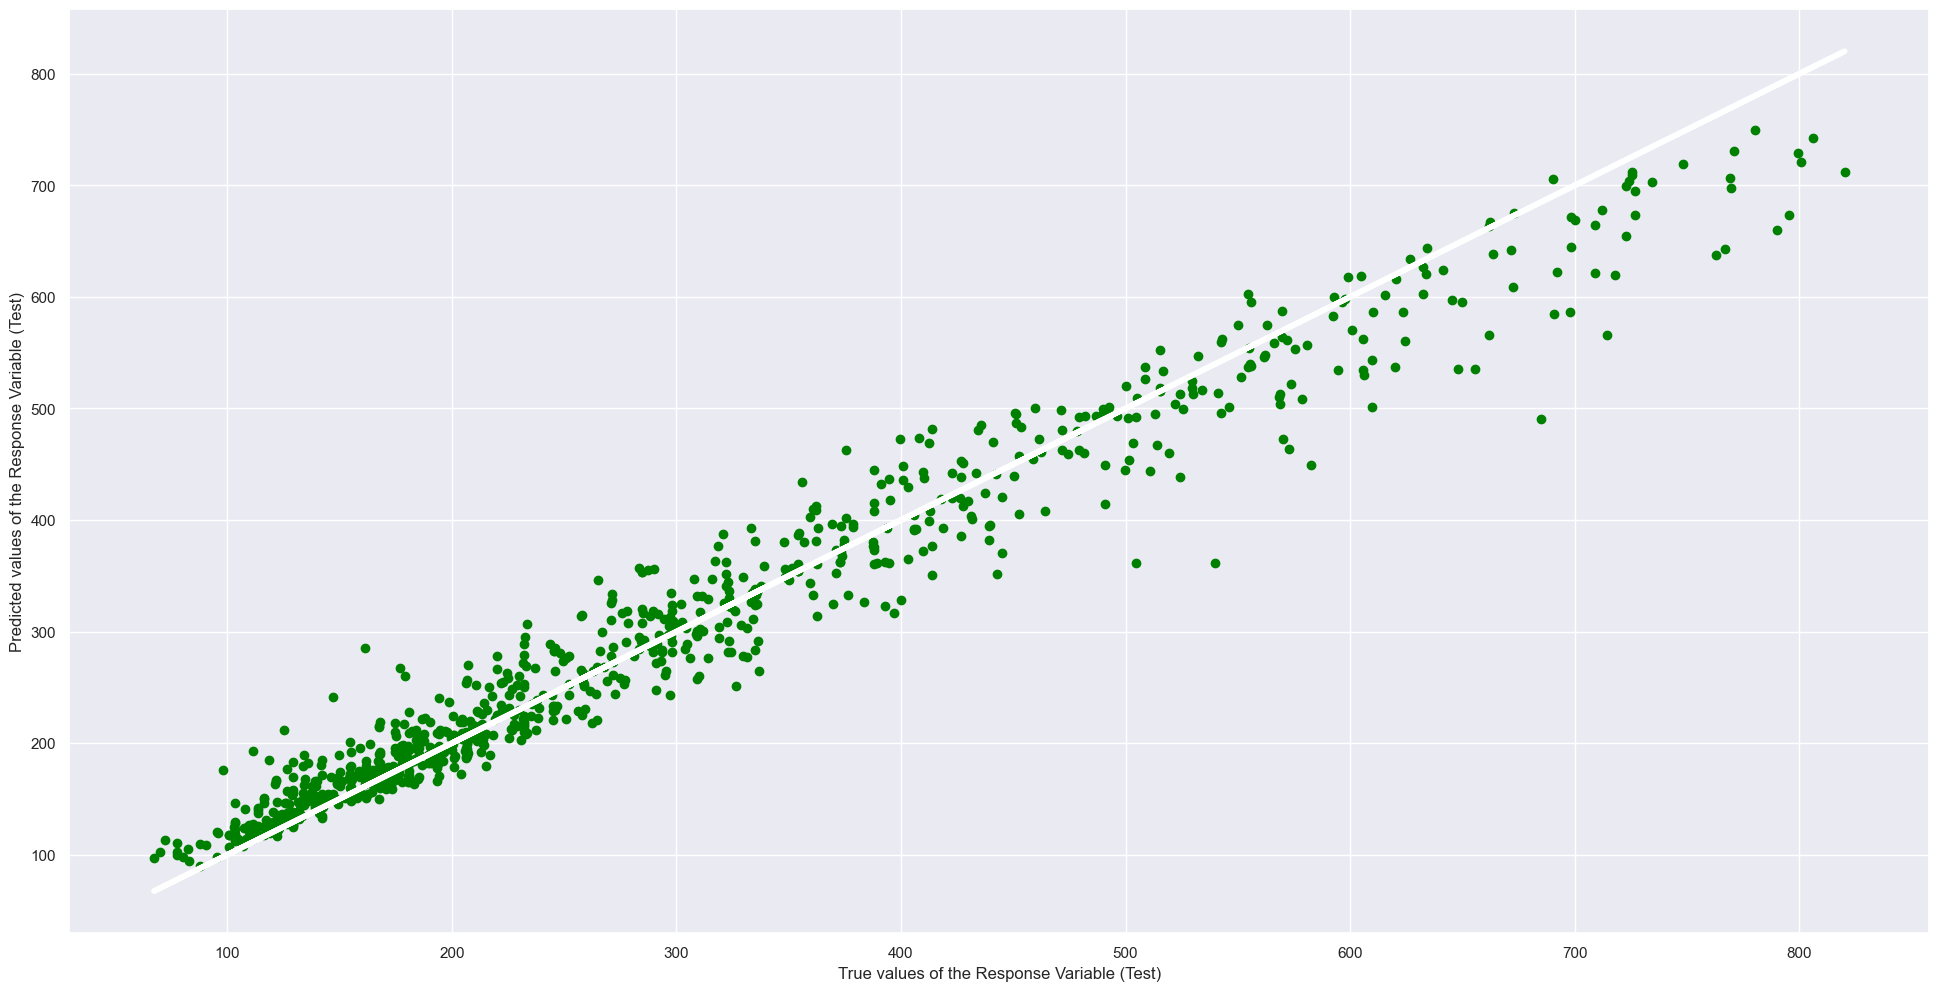

In [10]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
axes.scatter(y_test, y_test_pred, color = "green")
axes.plot(y_test, y_test, 'w-', linewidth = 4)
axes.set_xlabel("True values of the Response Variable (Test)")
axes.set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [11]:
df = pd.DataFrame(london, index=x_test.index)
y_pred_df = pd.DataFrame(y_test_pred, index=x_test.index)
y_pred_df.columns = ['predSum']
df = pd.concat([df, y_pred_df], axis=1)
df

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,predSum
4088,490.133823,2,False,False,4.0,False,0,1,4.0,20.0,1,3.296309,0.163589,365.399128,25.399299,885.041079,15.847399,-0.17332,51.51611,499.960018
3328,257.767116,1,False,True,3.0,False,1,0,9.0,93.0,1,7.637535,3.293507,149.698206,10.405688,302.033076,5.408154,-0.07308,51.44869,225.550930
1395,294.456596,2,False,False,2.0,False,0,0,10.0,97.0,1,5.011027,1.071302,217.588481,15.124817,423.920916,7.590658,-0.10080,51.46649,311.079753
3975,662.056963,2,False,False,4.0,False,0,1,10.0,99.0,2,4.209795,0.616457,315.278039,21.915326,618.832745,11.080717,-0.14278,51.54494,663.844399
1746,174.510219,1,False,True,2.0,False,0,1,9.0,91.0,1,6.697325,0.938767,197.737663,13.744964,405.190564,7.255275,-0.03169,51.50148,167.146452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3875,209.082998,1,False,True,5.0,False,0,1,9.0,80.0,1,4.159786,0.492722,348.045004,24.192994,854.423651,15.299168,-0.07032,51.51947,216.197465
679,504.715539,1,False,True,2.0,False,0,0,10.0,100.0,1,5.600725,0.235490,232.593954,16.167864,487.260411,8.724804,-0.04977,51.52177,361.487805
3085,154.519156,1,False,True,2.0,False,0,0,9.0,80.0,1,7.146279,3.988982,165.959184,11.536007,325.468409,5.827783,-0.05524,51.46262,159.801501
2939,180.389943,1,False,True,2.0,False,0,0,10.0,100.0,1,5.939314,0.809019,191.365901,13.302056,414.383204,7.419877,-0.11670,51.56128,166.763094


In [12]:
underpriced = df.query('realSum < predSum')
overpriced = df.query('realSum > predSum')

In [13]:
underpriced['guest_satisfaction_overall'].mean()

88.5691382765531

<Axes: xlabel='guest_satisfaction_overall'>

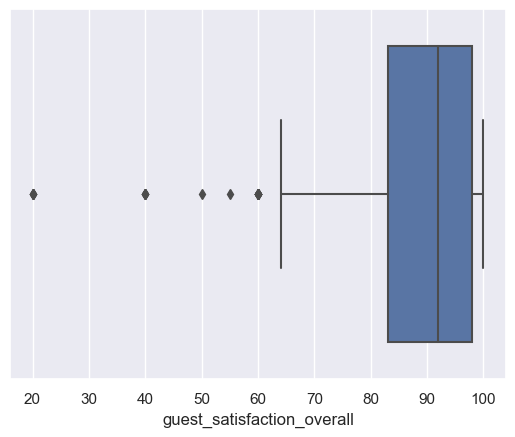

In [17]:
sb.boxplot(data = underpriced, x='guest_satisfaction_overall')

In [102]:
overpriced['guest_satisfaction_overall'].mean()

90.71506849315068

<Axes: xlabel='guest_satisfaction_overall'>

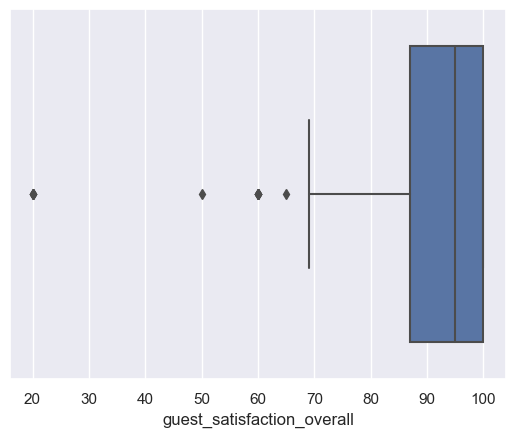

In [18]:
sb.boxplot(data = overpriced, x='guest_satisfaction_overall')